# **Balanceo del dataset usando la técnica Random Oversampling**

> Duplica aleatoriamente ejemplos de la clase minoritaria en el conjunto de datos 

Importar dependencias

In [1]:
import pandas as pd

In [30]:
import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import RandomOverSampler

Cargar Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
datos=pd.read_csv('/content/drive/MyDrive/ViolenciaPoíticaDeGénero/Transformación/data_clean_clasificado.csv')
datos.dropna(inplace = True)
datos.head(10)

,id,text,task
0,0,las glosas de muñoz que se quede para financia...,no violencia política de género
1,1,usted pavel un gran alcalde,no violencia política de género
2,2,dígame una ley que hacen desde la asamblea par...,no violencia política de género
3,3,el dinero de los afiliados al iess que desapar...,no violencia política de género
4,4,de este caso me estaba acordando,no violencia política de género
5,5,ojalá no sea la misma innovación de la roboluc...,no violencia política de género
6,6,habló la que se ganó tres veces la lotería,no violencia política de género
7,7,recuerda ese argentino que le dieron tremendo ...,no violencia política de género
8,8,pierrina calladita tu hermano es el que ha sac...,violencia política de género
9,9,siempre sido asi los únicos que se llenan los ...,no violencia política de género


In [11]:
datos['task'].value_counts()

no violencia política de género    16045
violencia política de género        3610
Name: task, dtype: int64

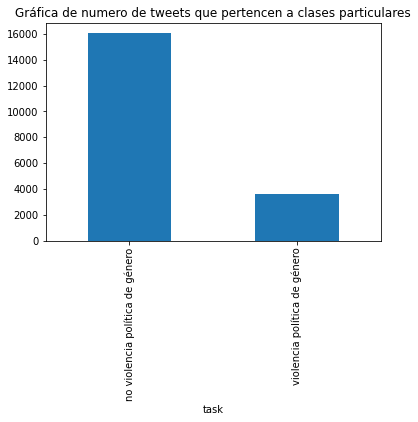

In [32]:
datos.groupby('task')['id'].nunique().plot(kind='bar',title='Gráfica de numero de tweets que pertencen a clases particulares')

# **Random Oversampling**

Cambio de str a int



In [ ]:
data = pd.DataFrame({'id': datos['id'], 'text': datos['text'], 'task': datos['task'] })
data.head(10)

In [8]:
labels = []
for i in range(len(data)):
  if data['task'][i][:9] == 'violencia':
    labels.append(1)
  else:
    labels.append(0)

In [9]:
df = pd.DataFrame({'id': datos['id'], 'text': datos['text'], 'task': datos['task'], 'labels': labels})
df.head(20)

,id,text,task,labels
0,0,las glosas de muñoz que se quede para financia...,no violencia política de género,0
1,1,usted pavel un gran alcalde,no violencia política de género,0
2,2,dígame una ley que hacen desde la asamblea par...,no violencia política de género,0
3,3,el dinero de los afiliados al iess que desapar...,no violencia política de género,0
4,4,de este caso me estaba acordando,no violencia política de género,0
5,5,ojalá no sea la misma innovación de la roboluc...,no violencia política de género,0
6,6,habló la que se ganó tres veces la lotería,no violencia política de género,0
7,7,recuerda ese argentino que le dieron tremendo ...,no violencia política de género,0
8,8,pierrina calladita tu hermano es el que ha sac...,violencia política de género,1
9,9,siempre sido asi los únicos que se llenan los ...,no violencia política de género,0


Aplica Random Oversampling

In [22]:
df_0_class = df[df['labels']==0]
df_1_class = df[df['labels']==1]
df_1_class_over = df_1_class.sample(df_0_class.shape[0],replace=True)
df = pd.concat([df_0_class, df_1_class_over], axis=0)

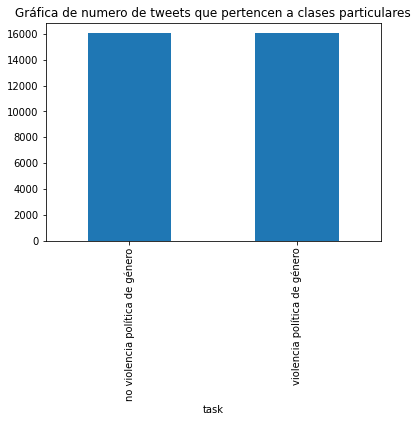

In [65]:
df.groupby('task')['id'].count().plot(kind='bar',title='Gráfica de numero de tweets que pertencen a clases particulares')

In [38]:
df['task'].value_counts()

no violencia política de género    16045
violencia política de género       16045
Name: task, dtype: int64

In [ ]:
del(df['labels'])

In [ ]:
df.to_csv('/content/drive/MyDrive/ViolenciaPoíticaDeGénero/Datos_Balanceados_Sinteticos.csv',index=False)